In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/mypersonality_final.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset to understand its structure
print(df.head())

                            #AUTHID  \
0  b7b7764cfa1c523e4e93ab2a79a946c4   
1  b7b7764cfa1c523e4e93ab2a79a946c4   
2  b7b7764cfa1c523e4e93ab2a79a946c4   
3  b7b7764cfa1c523e4e93ab2a79a946c4   
4  b7b7764cfa1c523e4e93ab2a79a946c4   

                                              STATUS  sEXT  sNEU  sAGR  sCON  \
0                        likes the sound of thunder.  2.65   3.0  3.15  3.25   
1  is so sleepy it's not even funny that's she ca...  2.65   3.0  3.15  3.25   
2  is sore and wants the knot of muscles at the b...  2.65   3.0  3.15  3.25   
3         likes how the day sounds in this new song.  2.65   3.0  3.15  3.25   
4                                        is home. <3  2.65   3.0  3.15  3.25   

   sOPN cEXT cNEU cAGR cCON cOPN               DATE  NETWORKSIZE  BETWEENNESS  \
0   4.4    n    y    n    n    y  06/19/09 03:21 PM        180.0      14861.6   
1   4.4    n    y    n    n    y   07-02-2009 08:41        180.0      14861.6   
2   4.4    n    y    n    n    y  06/15/0

In [ ]:
print(df.isnull().sum())

#AUTHID         4919
STATUS          4919
sEXT            4919
sNEU            4919
sAGR            4919
sCON            4919
sOPN            4919
cEXT            4919
cNEU            4919
cAGR            4919
cCON            4919
cOPN            4919
DATE            4919
NETWORKSIZE     4919
BETWEENNESS     4919
NBETWEENNESS    4919
DENSITY         4919
BROKERAGE       4919
NBROKERAGE      4919
TRANSITIVITY    4919
dtype: int64


In [ ]:
# Drop rows where 'STATUS' column is null
df = df.dropna(subset=['STATUS'])

# Fill missing values in the personality trait columns with the median value
for col in ['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']:
    df[col] = df[col].fillna(df[col].median())

# Optional: If you want to replace the null 'STATUS' with an empty string instead of dropping
# df['STATUS'] = df['STATUS'].fillna('')

# Verify there are no more missing values
print(df.isnull().sum())


#AUTHID         0
STATUS          0
sEXT            0
sNEU            0
sAGR            0
sCON            0
sOPN            0
cEXT            0
cNEU            0
cAGR            0
cCON            0
cOPN            0
DATE            0
NETWORKSIZE     0
BETWEENNESS     0
NBETWEENNESS    0
DENSITY         0
BROKERAGE       0
NBROKERAGE      0
TRANSITIVITY    0
dtype: int64


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset (adjust the path as needed)

# Print the number of missing values in the specified columns
print("Missing values before handling:")
print(df[['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']].isnull().sum())

# Fill missing values in each column with the mean of that column
for col in ['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']:
    df[col] = df[col].fillna(df[col].mean())

# Verify the null values are filled
print("\nMissing values after imputing with mean:")
print(df[['NETWORKSIZE', 'BETWEENNESS', 'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY']].isnull().sum())

# Optionally, save the cleaned dataset
# df.to_csv('/path/to/save/imputed_data.csv', index=False)


Missing values before handling:
NETWORKSIZE     0
BETWEENNESS     0
NBETWEENNESS    0
DENSITY         0
BROKERAGE       0
NBROKERAGE      0
TRANSITIVITY    0
dtype: int64

Missing values after imputing with mean:
NETWORKSIZE     0
BETWEENNESS     0
NBETWEENNESS    0
DENSITY         0
BROKERAGE       0
NBROKERAGE      0
TRANSITIVITY    0
dtype: int64


In [ ]:
print(df.isnull().sum())


#AUTHID         0
STATUS          0
sEXT            0
sNEU            0
sAGR            0
sCON            0
sOPN            0
cEXT            0
cNEU            0
cAGR            0
cCON            0
cOPN            0
DATE            0
NETWORKSIZE     0
BETWEENNESS     0
NBETWEENNESS    0
DENSITY         0
BROKERAGE       0
NBROKERAGE      0
TRANSITIVITY    0
dtype: int64


In [ ]:

# Download the stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuations
    text = re.sub(r'\W', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove additional whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'STATUS' column
df['cleaned_status'] = df['STATUS'].apply(lambda x: clean_text(str(x)))

# Display the cleaned status
df[['STATUS', 'cleaned_status']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,STATUS,cleaned_status
0,likes the sound of thunder.,likes sound thunder
1,is so sleepy it's not even funny that's she ca...,sleepy even funny get sleep
2,is sore and wants the knot of muscles at the b...,sore wants knot muscles base neck stop hurting...
3,likes how the day sounds in this new song.,likes day sounds new song
4,is home. <3,home


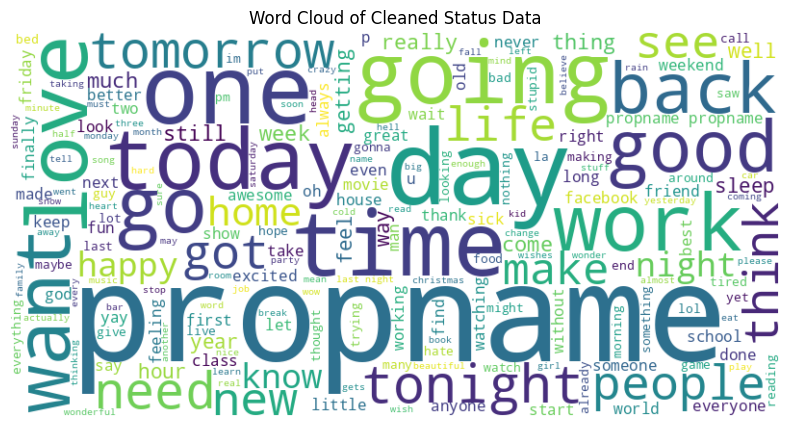

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Join all cleaned text into one string
all_words = ' '.join(df['cleaned_status'].dropna())  # Ensure there are no NaN values

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title("Word Cloud of Cleaned Status Data")
plt.show()


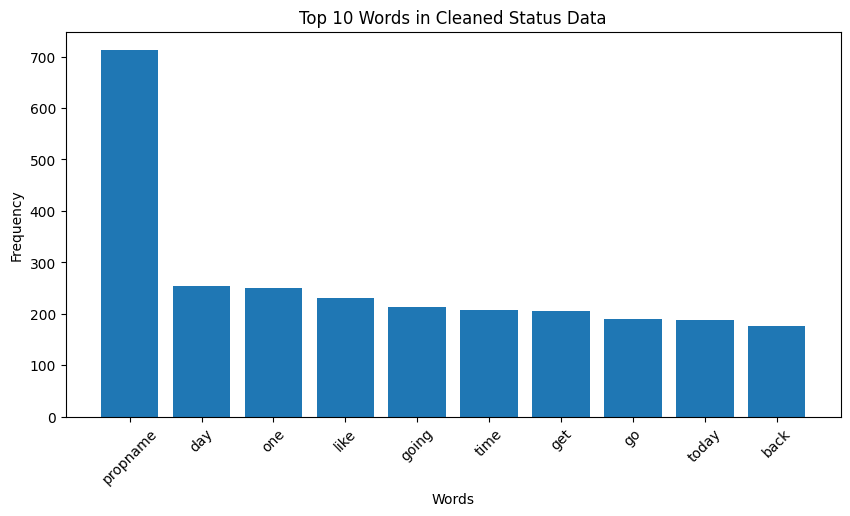

In [ ]:
from collections import Counter

# Count word frequencies
word_counts = Counter(all_words.split())
top_n_words = word_counts.most_common(10)  # Get the top 10 most common words

# Prepare data for plotting
words, counts = zip(*top_n_words)

# Create a bar graph
plt.figure(figsize=(10, 5))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Cleaned Status Data')
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip install keras tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer with a limit on the number of words
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')

# Fit the tokenizer on the cleaned text
tokenizer.fit_on_texts(df['cleaned_status'])

# Convert text to sequences (integer encoding)
sequences = tokenizer.texts_to_sequences(df['cleaned_status'])

# Display the first few tokenized sequences
print(sequences[:5])

[[762, 684, 763], [441, 56, 283, 8, 40], [510, 45, 4034, 2590, 1856, 1411, 143, 2591, 511, 78, 1857], [762, 3, 866, 12, 340], [24]]


<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4997
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   #AUTHID         4998 non-null   object 
 1   STATUS          4998 non-null   object 
 2   sEXT            4998 non-null   float64
 3   sNEU            4998 non-null   float64
 4   sAGR            4998 non-null   float64
 5   sCON            4998 non-null   float64
 6   sOPN            4998 non-null   float64
 7   cEXT            4998 non-null   object 
 8   cNEU            4998 non-null   object 
 9   cAGR            4998 non-null   object 
 10  cCON            4998 non-null   object 
 11  cOPN            4998 non-null   object 
 12  DATE            4998 non-null   object 
 13  NETWORKSIZE     4998 non-null   float64
 14  BETWEENNESS     4998 non-null   float64
 15  NBETWEENNESS    4998 non-null   float64
 16  DENSITY         4998 non-null   float64
 17  BROKERAGE       4998 non-null   float6

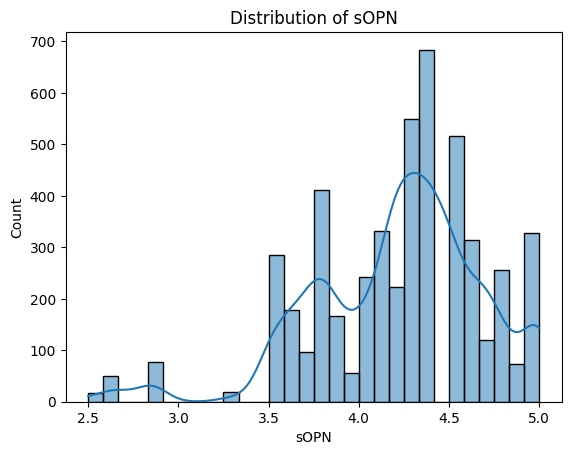

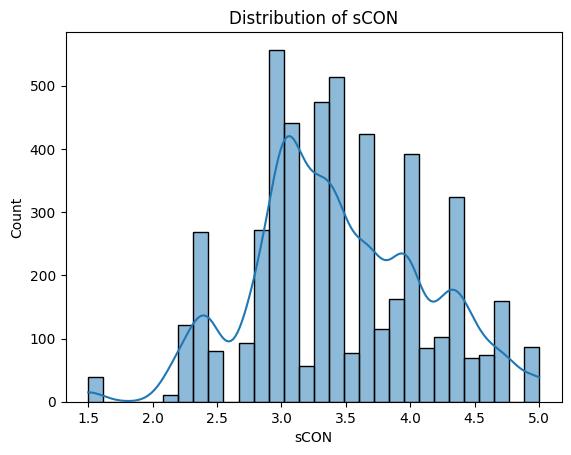

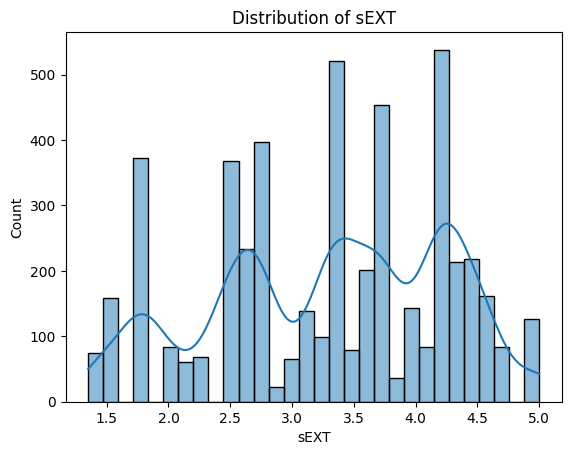

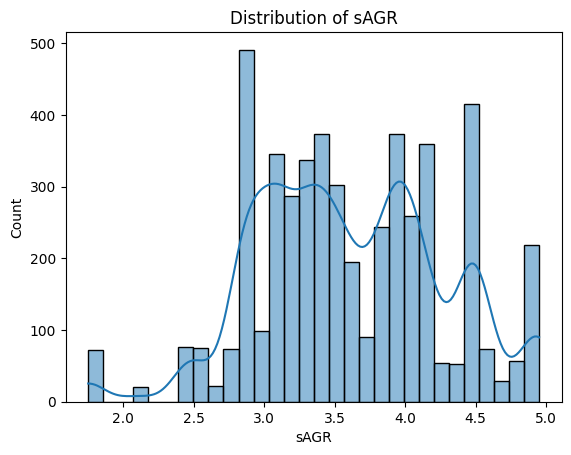

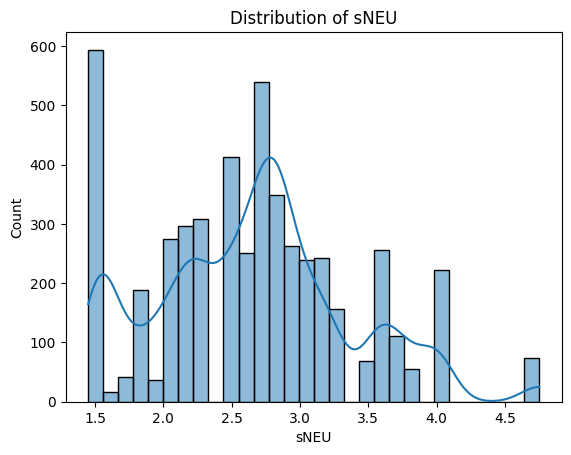

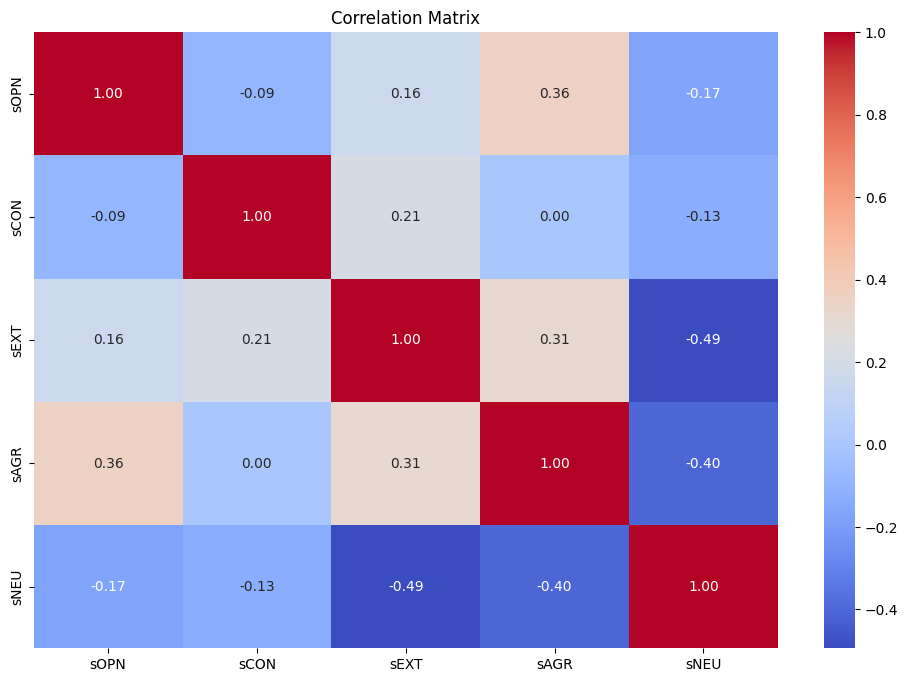

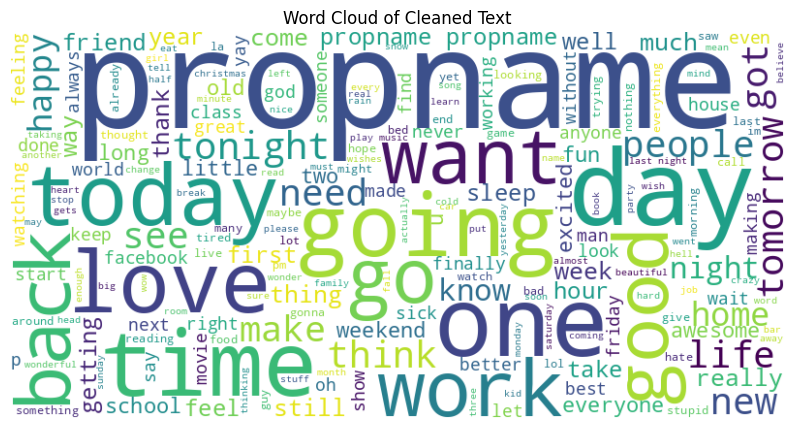

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Example dataframe
# df = pd.read_csv('your_data.csv')  # Replace with your actual dataframe

# Define your target columns (replace these with your actual target column names)
target_columns = ['sOPN', 'sCON', 'sEXT', 'sAGR', 'sNEU']  # Update with actual numeric target columns

# Basic Info
print(df.info())

# Descriptive Statistics
print(df.describe())

# Missing Values
print(df.isnull().sum())

# Distribution of Target Variables
for col in target_columns:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation Matrix (including target columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df[target_columns].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Word Cloud for Cleaned Text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_status'].dropna()))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text')
plt.show()


In [ ]:
from keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure uniform length
max_length = 100  # Define max length for padding
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Display the padded sequences
print(padded_sequences[:5])


[[ 762  684  763    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 441   56  283    8   40    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming padded_sequences is already defined
# Define the personality traits you want to model
traits = ['sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN']

# Store results for each trait
results = {}

# Loop through each trait
for trait in traits:
    # Define the target variable for the current trait
    y = df[trait]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

    # Check the shape of the split datasets
    print(f"{trait} - Training set shape: {X_train.shape}, Test set shape: {X_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

    # Here you can add your model training code for each trait
    # For example:
    # model.fit(X_train, y_train)
    # y_pred = model.predict(X_test)
    # You can calculate and store metrics here

    # You might also want to store the results in the results dictionary
    # results[trait] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score}


sEXT - Training set shape: (3998, 100), Test set shape: (1000, 100), y_train shape: (3998,), y_test shape: (1000,)
sNEU - Training set shape: (3998, 100), Test set shape: (1000, 100), y_train shape: (3998,), y_test shape: (1000,)
sAGR - Training set shape: (3998, 100), Test set shape: (1000, 100), y_train shape: (3998,), y_test shape: (1000,)
sCON - Training set shape: (3998, 100), Test set shape: (1000, 100), y_train shape: (3998,), y_test shape: (1000,)
sOPN - Training set shape: (3998, 100), Test set shape: (1000, 100), y_train shape: (3998,), y_test shape: (1000,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the cleaned text for the training set
X_train_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_status'].iloc[y_train.index])

# Transform the cleaned text for the test set
X_test_tfidf = tfidf_vectorizer.transform(df['cleaned_status'].iloc[y_test.index])

# Convert to dense arrays for compatibility with models
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# Display the shape of the TF-IDF matrices
print(X_train_tfidf.shape, X_test_tfidf.shape)


(3998, 8382) (1000, 8382)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer for TF
tf_vectorizer = CountVectorizer(max_features=10000)

# Fit and transform the cleaned text for both train and test sets
# Use the original indices from the train_test_split to select data
# Get the row indices from y_train and y_test
X_train_tf = tf_vectorizer.fit_transform(df['cleaned_status'].iloc[y_train.index])
X_test_tf = tf_vectorizer.transform(df['cleaned_status'].iloc[y_test.index])

# Convert to dense arrays for compatibility with models
X_train_tf = X_train_tf.toarray()
X_test_tf = X_test_tf.toarray()

# Display the shape of the TF matrices
print(X_train_tf.shape, X_test_tf.shape)

(3998, 8382) (1000, 8382)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.sequence import pad_sequences

# Assuming `padded_sequences` is already defined and is your input data
# Define parameters
embedding_dim = 100
lstm_units = 64
max_length = X_train.shape[1]  # Assuming X_train is already defined

# Define the LSTM model architecture
lstm_model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, input_length=max_length),
    LSTM(lstm_units, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Change to suit your output (e.g., binary classification)
])

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Update loss as per your task

# Train the LSTM model on the padded sequences (X_train) and target (y_train)
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=1)

# Extract features from the LSTM layer for both train and test sets
X_train_lstm_features = lstm_model.predict(X_train)
X_test_lstm_features = lstm_model.predict(X_test)

# Display the shape of the LSTM feature matrices
print(X_train_lstm_features.shape, X_test_lstm_features.shape)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 163ms/step - accuracy: 0.0000e+00 - loss: -10.8115
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.0000e+00 - loss: -78.7010
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 152ms/step - accuracy: 0.0000e+00 - loss: -175.1216
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.0000e+00 - loss: -306.9291
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.0000e+00 - loss: -481.3735
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
(3998, 1) (1000, 1)


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# Initialize classifiers
classifiers = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': xgb.XGBClassifier(n_estimators=100),
    'CatBoost': CatBoostClassifier(iterations=100, silent=True)
}

# Define threshold for converting target variables to discrete classes
threshold = 4

# Loop through each personality trait and train a separate model
for trait in ['sEXT', 'sNEU', 'sAGR', 'sOPN', 'sCON']:  # Add your target columns here
    # Convert target variables to discrete classes
    y_train = (df[trait].iloc[y_train.index] > threshold).astype(int)  # Use original indices from y_train
    y_test = (df[trait].iloc[y_test.index] > threshold).astype(int)    # Use original indices from y_test

    # Train on TF-IDF features
    for name, model in classifiers.items():
        model.fit(X_train_tfidf, y_train)

        # Evaluate on the test set
        accuracy = model.score(X_test_tfidf, y_test)
        print(f"{name} Accuracy for {trait}:", accuracy)


AdaBoost Accuracy for sEXT: 0.693
GradientBoosting Accuracy for sEXT: 0.721
XGBoost Accuracy for sEXT: 0.718
CatBoost Accuracy for sEXT: 0.733
AdaBoost Accuracy for sNEU: 0.982
GradientBoosting Accuracy for sNEU: 0.98
XGBoost Accuracy for sNEU: 0.988
CatBoost Accuracy for sNEU: 0.99
AdaBoost Accuracy for sAGR: 0.731
GradientBoosting Accuracy for sAGR: 0.756
XGBoost Accuracy for sAGR: 0.746
CatBoost Accuracy for sAGR: 0.757
AdaBoost Accuracy for sOPN: 0.705
GradientBoosting Accuracy for sOPN: 0.707
XGBoost Accuracy for sOPN: 0.703
CatBoost Accuracy for sOPN: 0.71
AdaBoost Accuracy for sCON: 0.798
GradientBoosting Accuracy for sCON: 0.818
XGBoost Accuracy for sCON: 0.809
CatBoost Accuracy for sCON: 0.82


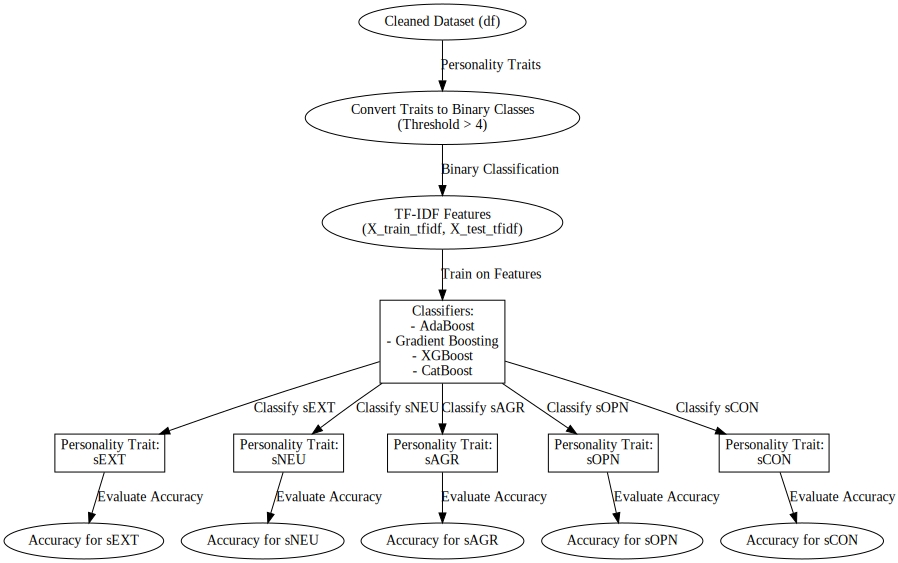

In [ ]:
from graphviz import Digraph

# Create a new Digraph object
dot = Digraph(comment='Personality Trait Classification Workflow')

# Step 1: Input dataset
dot.node('A', 'Cleaned Dataset (df)', shape='ellipse')

# Step 2: Preprocessing (Convert to Binary Classes)
dot.node('B', 'Convert Traits to Binary Classes\n(Threshold > 4)', shape='ellipse')

# Step 3: TF-IDF Features
dot.node('C', 'TF-IDF Features\n(X_train_tfidf, X_test_tfidf)', shape='ellipse')

# Classifier Group
dot.node('D', 'Classifiers:\n- AdaBoost\n- Gradient Boosting\n- XGBoost\n- CatBoost', shape='box')

# Personality Traits Nodes
dot.node('E1', 'Personality Trait:\nsEXT', shape='box')
dot.node('E2', 'Personality Trait:\nsNEU', shape='box')
dot.node('E3', 'Personality Trait:\nsAGR', shape='box')
dot.node('E4', 'Personality Trait:\nsOPN', shape='box')
dot.node('E5', 'Personality Trait:\nsCON', shape='box')

# Evaluation Nodes
dot.node('F1', 'Accuracy for sEXT', shape='ellipse')
dot.node('F2', 'Accuracy for sNEU', shape='ellipse')
dot.node('F3', 'Accuracy for sAGR', shape='ellipse')
dot.node('F4', 'Accuracy for sOPN', shape='ellipse')
dot.node('F5', 'Accuracy for sCON', shape='ellipse')

# Connecting Dataset to Preprocessing
dot.edge('A', 'B', label='Personality Traits')

# Connecting Preprocessing to TF-IDF
dot.edge('B', 'C', label='Binary Classification')

# Connecting TF-IDF to Classifiers
dot.edge('C', 'D', label='Train on Features')

# Connecting Classifiers to Each Personality Trait
dot.edge('D', 'E1', label='Classify sEXT')
dot.edge('D', 'E2', label='Classify sNEU')
dot.edge('D', 'E3', label='Classify sAGR')
dot.edge('D', 'E4', label='Classify sOPN')
dot.edge('D', 'E5', label='Classify sCON')

# Connecting Each Trait Classification to Accuracy Evaluation
dot.edge('E1', 'F1', label='Evaluate Accuracy')
dot.edge('E2', 'F2', label='Evaluate Accuracy')
dot.edge('E3', 'F3', label='Evaluate Accuracy')
dot.edge('E4', 'F4', label='Evaluate Accuracy')
dot.edge('E5', 'F5', label='Evaluate Accuracy')

# Render the graph to a file (optional)
dot.render('personality_classification_compact.gv', view=True)

# Display in notebook or interactive environments
dot


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest classifier
random_forest = RandomForestClassifier(n_estimators=10, random_state=42)

# List of personality traits to classify
traits = ['sEXT', 'sNEU', 'sAGR', 'sOPN', 'sCON']  # Add all your traits here

# Loop through each personality trait and train a separate RandomForest model
for trait in traits:
    # Convert target variables to discrete classes
    y_train = (df[trait].iloc[y_train.index] > threshold).astype(int)  # Use original indices from y_train
    y_test = (df[trait].iloc[y_test.index] > threshold).astype(int)    # Use original indices from y_test

    # Train RandomForest on TF-IDF features
    random_forest.fit(X_train_tfidf, y_train)

    # Evaluate RandomForest on the test set
    accuracy = random_forest.score(X_test_tfidf, y_test)
    print(f"RandomForest Accuracy for {trait}:", accuracy)


RandomForest Accuracy for sEXT: 0.717
RandomForest Accuracy for sNEU: 0.986
RandomForest Accuracy for sAGR: 0.759
RandomForest Accuracy for sOPN: 0.67
RandomForest Accuracy for sCON: 0.811


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, log_loss
import numpy as np

# List of personality traits to classify
traits = ['sEXT', 'sNEU', 'sAGR', 'sOPN', 'sCON']  # Add all your traits here

# Loop through each personality trait and train a separate RandomForest model
for trait in traits:
    # Convert target variables to discrete classes
    y_train = (df[trait].iloc[y_train.index] > threshold).astype(int)  # Use original indices from y_train
    y_test = (df[trait].iloc[y_test.index] > threshold).astype(int)    # Use original indices from y_test

    # Train RandomForest on TF-IDF features
    random_forest.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = random_forest.predict(X_test_tfidf)

    # Calculate overall metrics
    emr = 1 - accuracy_score(y_test, y_pred)  # Error Rate
    zero_one_loss = np.mean(y_pred != y_test)  # 0/1 Loss
    hamming_loss_value = hamming_loss(y_test, y_pred)  # Hamming Loss
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy
    precision = precision_score(y_test, y_pred, zero_division=0)  # Precision
    recall = recall_score(y_test, y_pred, zero_division=0)  # Recall
    f1 = f1_score(y_test, y_pred, zero_division=0)  # F1-score

    # Display metrics
    print(f"Metrics for {trait}:")
    print(f"  EMR: {emr:.4f}")
    print(f"  0/1 Loss: {zero_one_loss:.4f}")
    print(f"  Hamming Loss: {hamming_loss_value:.4f}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-score: {f1:.4f}")
    print()  # Blank line for better readability


Metrics for sEXT:
  EMR: 0.2830
  0/1 Loss: 0.2830
  Hamming Loss: 0.2830
  Accuracy: 0.7170
  Precision: 0.5053
  Recall: 0.1690
  F1-score: 0.2533

Metrics for sNEU:
  EMR: 0.0140
  0/1 Loss: 0.0140
  Hamming Loss: 0.0140
  Accuracy: 0.9860
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000

Metrics for sAGR:
  EMR: 0.2410
  0/1 Loss: 0.2410
  Hamming Loss: 0.2410
  Accuracy: 0.7590
  Precision: 0.5641
  Recall: 0.1753
  F1-score: 0.2675

Metrics for sOPN:
  EMR: 0.3300
  0/1 Loss: 0.3300
  Hamming Loss: 0.3300
  Accuracy: 0.6700
  Precision: 0.7116
  Recall: 0.8715
  F1-score: 0.7835

Metrics for sCON:
  EMR: 0.1890
  0/1 Loss: 0.1890
  Hamming Loss: 0.1890
  Accuracy: 0.8110
  Precision: 0.5263
  Recall: 0.1562
  F1-score: 0.2410



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
import numpy as np

# Initialize lists to store true labels and predictions for all traits
all_y_test = []
all_y_pred = []

# List of personality traits to classify
traits = ['sEXT', 'sNEU', 'sAGR', 'sOPN', 'sCON']  # Add all your traits here

# Loop through each personality trait
for trait in traits:
    # Convert target variables to discrete classes
    y_train = (df[trait].iloc[y_train.index] > threshold).astype(int)  # Use original indices from y_train
    y_test = (df[trait].iloc[y_test.index] > threshold).astype(int)    # Use original indices from y_test

    # Train RandomForest on TF-IDF features
    random_forest.fit(X_train_tfidf, y_train)

    # Make predictions on the test set
    y_pred = random_forest.predict(X_test_tfidf)

    # Append results to the lists
    all_y_test.append(y_test)
    all_y_pred.append(y_pred)

# Convert lists to numpy arrays
all_y_test = np.concatenate(all_y_test)
all_y_pred = np.concatenate(all_y_pred)

# Calculate overall metrics
emr = 1 - accuracy_score(all_y_test, all_y_pred)  # Error Rate
zero_one_loss = np.mean(all_y_pred != all_y_test)  # 0/1 Loss
hamming_loss_value = hamming_loss(all_y_test, all_y_pred)  # Hamming Loss
accuracy = accuracy_score(all_y_test, all_y_pred)  # Accuracy
precision = precision_score(all_y_test, all_y_pred, average='macro', zero_division=0)  # Precision
recall = recall_score(all_y_test, all_y_pred, average='macro', zero_division=0)  # Recall
f1 = f1_score(all_y_test, all_y_pred, average='macro', zero_division=0)  # F1-score

# Display metrics
print("Overall Metrics Across All Traits:")
print(f"  EMR: {emr:.4f}")
print(f"  0/1 Loss: {zero_one_loss:.4f}")
print(f"  Hamming Loss: {hamming_loss_value:.4f}")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-score: {f1:.4f}")


Overall Metrics Across All Traits:
  EMR: 0.2114
  0/1 Loss: 0.2114
  Hamming Loss: 0.2114
  Accuracy: 0.7886
  Precision: 0.7453
  Recall: 0.7034
  F1-score: 0.7178


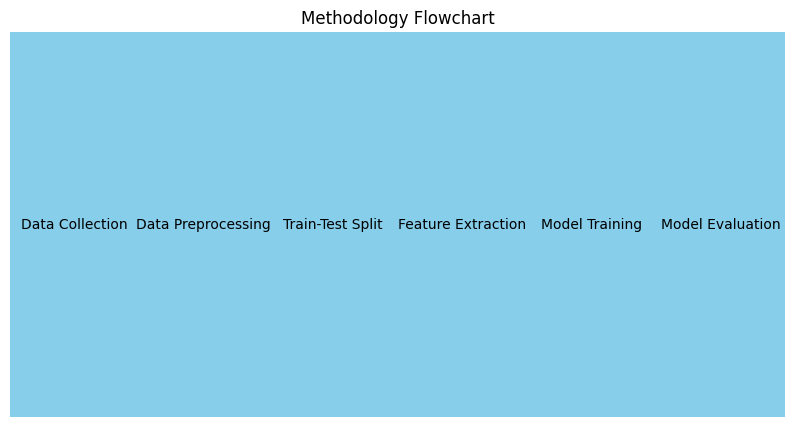

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a flowchart-like representation
fig, ax = plt.subplots(figsize=(10, 5))

# Draw boxes for each step
steps = ['Data Collection', 'Data Preprocessing', 'Train-Test Split',
         'Feature Extraction', 'Model Training', 'Model Evaluation']

for i, step in enumerate(steps):
    ax.add_patch(mpatches.Rectangle((i, 0), 1, 1, fill=True, color='skyblue', edgecolor='black'))
    ax.text(i + 0.5, 0.5, step, ha='center', va='center', fontsize=10)

# Setting limits and removing axes
ax.set_xlim(0, len(steps))
ax.set_ylim(0, 1)
ax.axis('off')

plt.title('Methodology Flowchart')
plt.show()


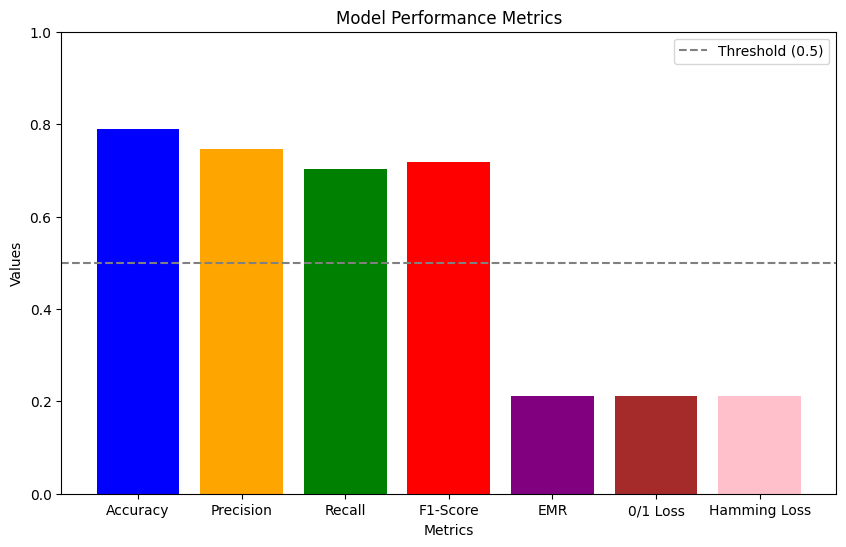

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'EMR', '0/1 Loss', 'Hamming Loss']
values = [0.7886, 0.7453, 0.7034, 0.7178, 0.2114, 0.2114, 0.2114]  # Example values

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.axhline(0.5, color='gray', linestyle='--', label='Threshold (0.5)')  # Example threshold line
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.show()


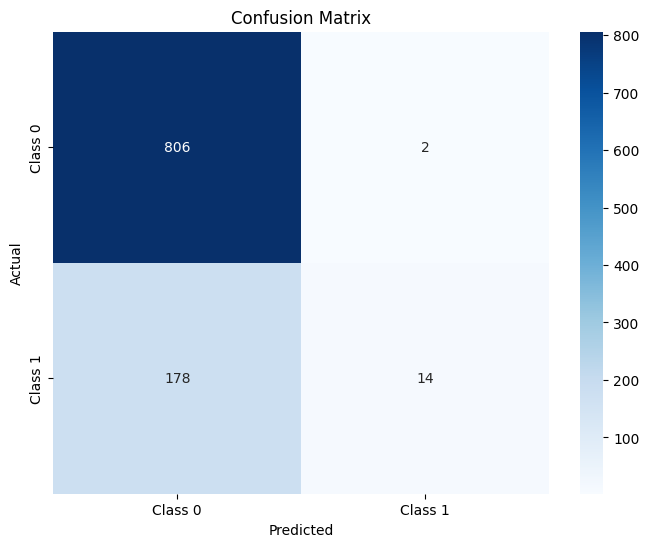

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_true and y_pred are your true and predicted labels
y_true = y_test  # Use your actual test labels
y_pred = model.predict(X_test_tfidf)  # Replace with your model prediction

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


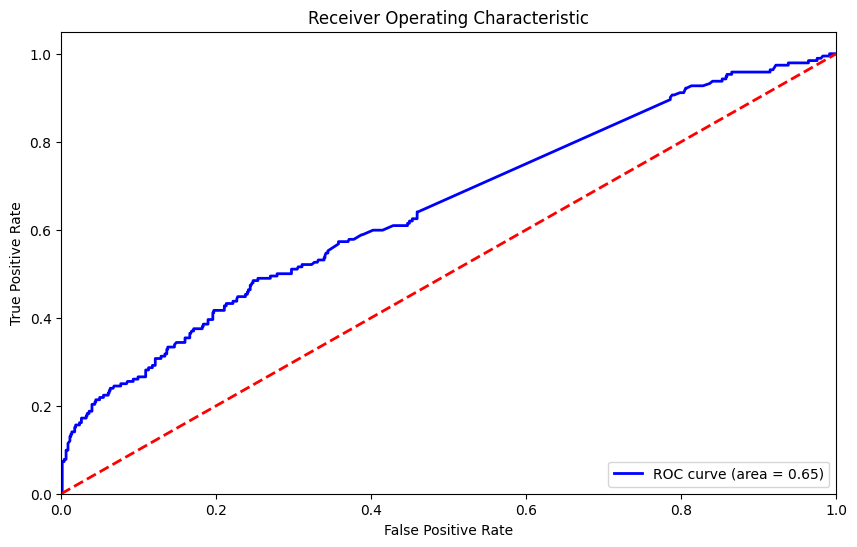

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd

# Example dataset
data = {
    'personality_traits': ['Openness', 'Conscientiousness', 'Extraversion',
                           'Agreeableness', 'Neuroticism', 'Openness',
                           'Conscientiousness', 'Extraversion',
                           'Agreeableness', 'Neuroticism',
                           'Openness', 'Conscientiousness',
                           'Extraversion', 'Agreeableness', 'Neuroticism'],
}

df = pd.DataFrame(data)

# Count the occurrences of each personality trait
trait_counts = df['personality_traits'].value_counts()


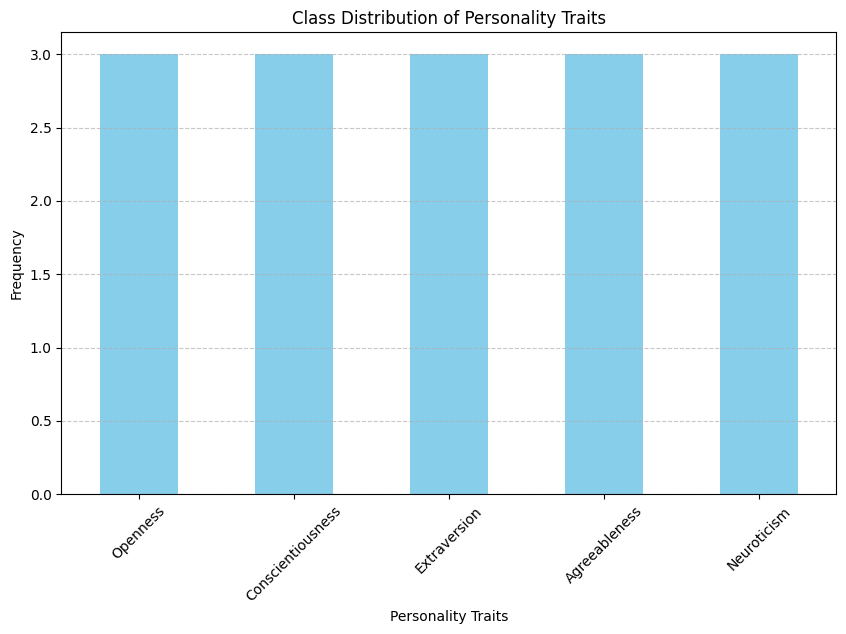

In [ ]:
import matplotlib.pyplot as plt

# Bar graph for class distribution
plt.figure(figsize=(10, 6))
trait_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Personality Traits')
plt.xlabel('Personality Traits')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


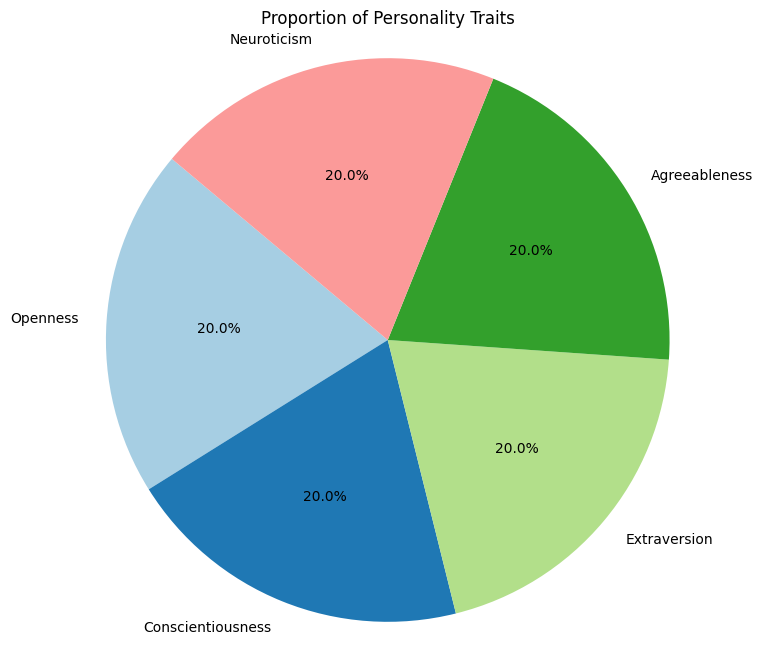

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(8, 8))
plt.pie(trait_counts, labels=trait_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Personality Traits')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


In [ ]:
pip install matplotlib seaborn


In [ ]:
import pandas as pd

# Define the metrics for each personality trait
data = {
    'Personality Trait': ['sEXT', 'sNEU', 'sAGR', 'sOPN', 'sCON'],
    'EMR': [0.2830, 0.0140, 0.2410, 0.3300, 0.1890],
    '0/1 Loss': [0.2830, 0.0140, 0.2410, 0.3300, 0.1890],
    'Hamming Loss': [0.2830, 0.0140, 0.2410, 0.3300, 0.1890],
    'Accuracy': [0.7170, 0.9860, 0.7590, 0.6700, 0.8110],
    'Precision': [0.5053, 0.0000, 0.5641, 0.7116, 0.5263],
    'Recall': [0.1690, 0.0000, 0.1753, 0.8715, 0.1562],
    'F1-score': [0.2533, 0.0000, 0.2675, 0.7835, 0.2410]
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)


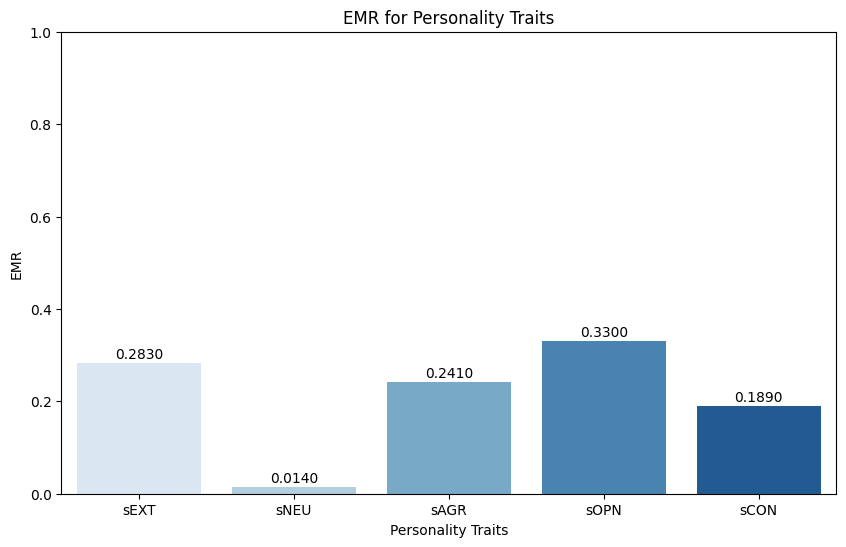

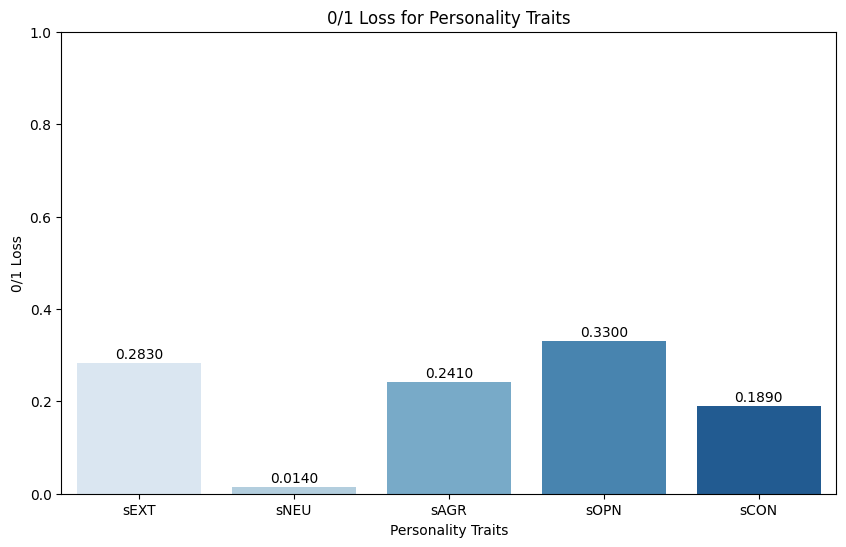

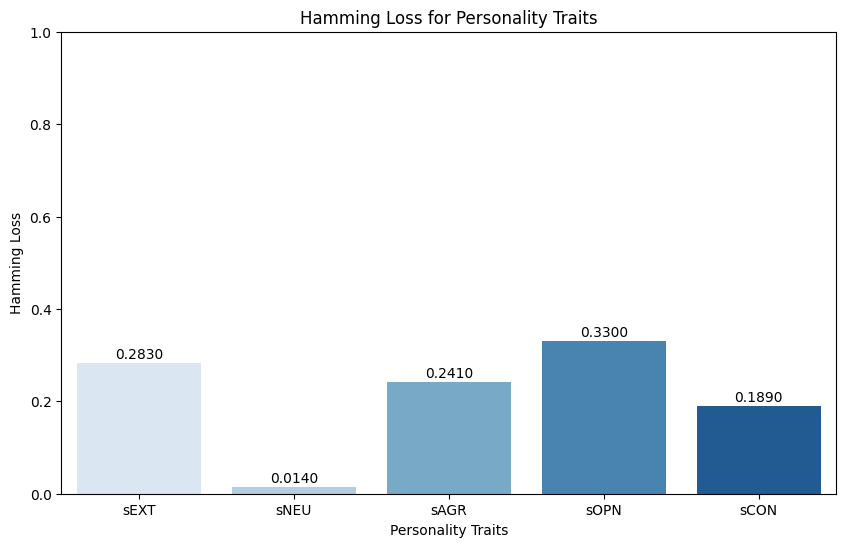

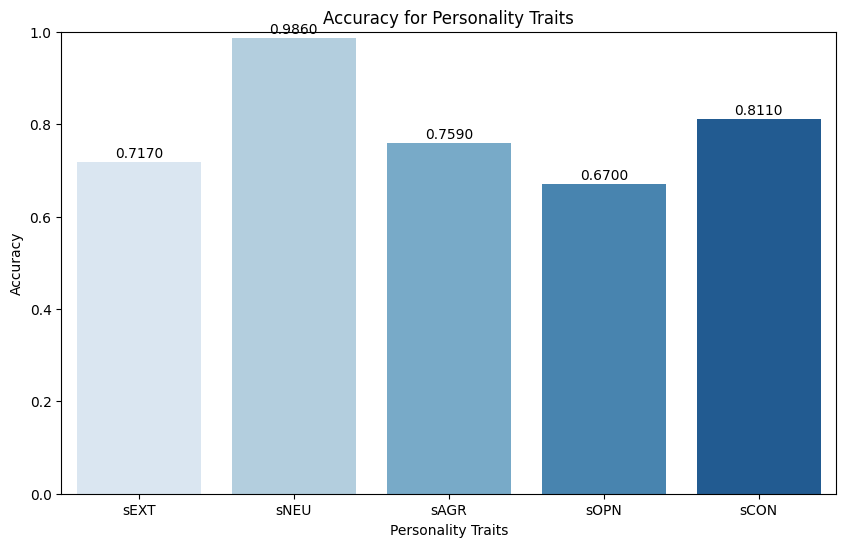

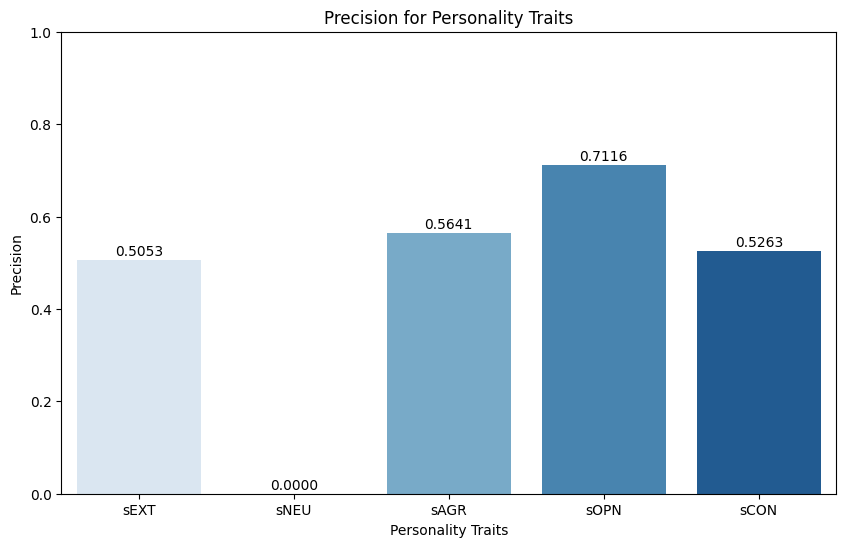

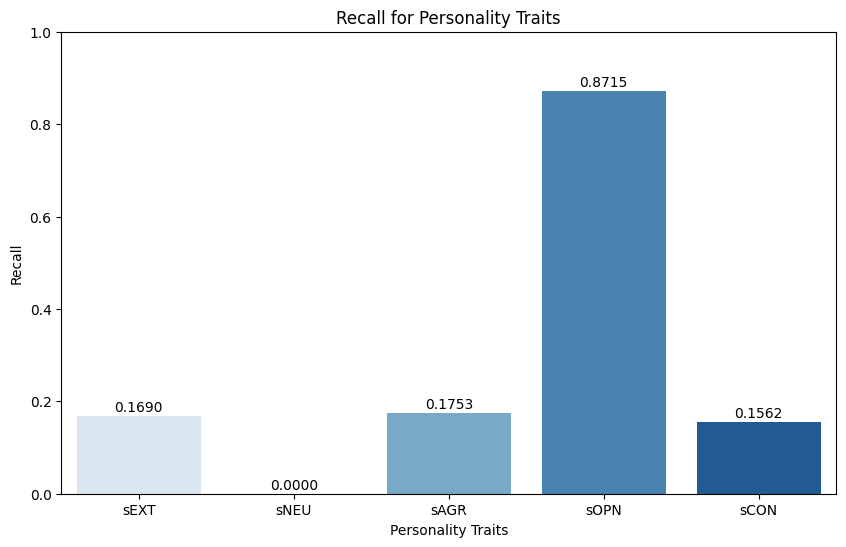

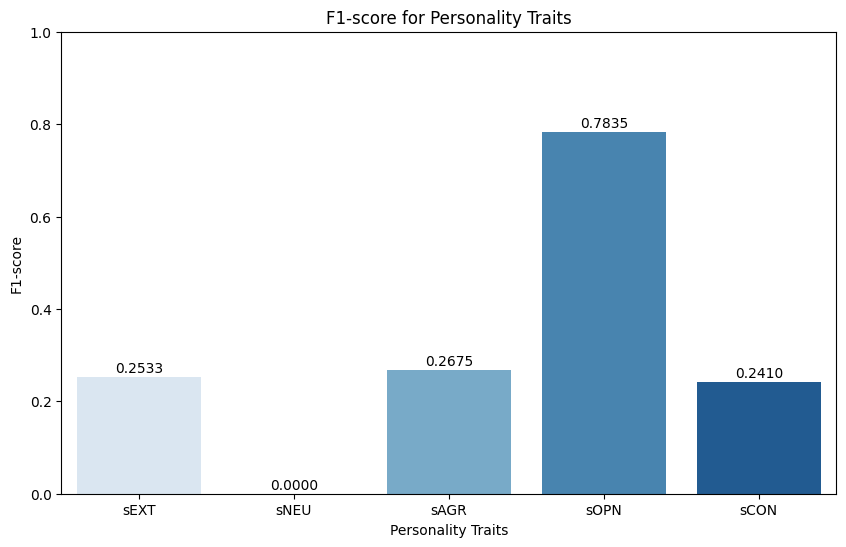

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metric(metric_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Personality Trait', y=metric_name, data=df_metrics, palette='Blues')

    plt.title(f'{metric_name} for Personality Traits')
    plt.xlabel('Personality Traits')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

    # Show the metric values on top of each bar
    for index, value in enumerate(df_metrics[metric_name]):
        plt.text(index, value + 0.01, f"{value:.4f}", ha='center')

    plt.show()

# Plot each metric
for metric in df_metrics.columns[1:]:  # Skip the first column which is 'Personality Trait'
    plot_metric(metric)


In [ ]:
pip install wordcloud matplotlib


In [ ]:
print(df.columns)


Index(['personality_traits'], dtype='object')


In [ ]:
# Combine all text data into a single string
text_data = ' '.join(df['personality_traits'].astype(str))


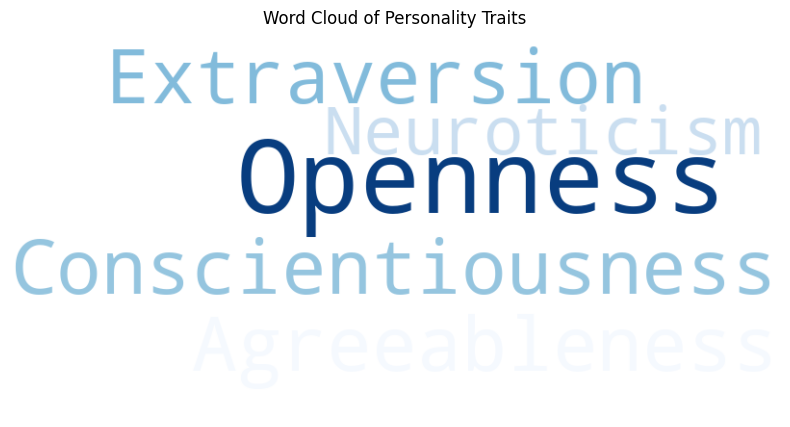

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud using the combined text data
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Personality Traits')
plt.show()
